## Question 1: Linear regression with one explanatory variable 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [3]:
# Load data with appropriate encoding and format
ftse_data = pd.read_csv('FTSE100 (1).csv', encoding='ISO-8859-1', parse_dates= ["Date"])  # Adjust encoding as needed
house_data = pd.read_excel('Monthly.xls', parse_dates= ["Unnamed: 0"])  # Load Excel file directly
# Rename the column
house_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)


In [4]:
house_data.head()

Date  Average House Price  INDEX Q1 1993=100  \
0 1991-01-01         53051.721106         105.832511   
1 1991-02-01         53496.798746         106.720393   
2 1991-03-01         52892.861606         105.515603   
3 1991-04-01         53677.435270         107.080744   
4 1991-05-01         54385.726747         108.493710   

   Seasonally Adjusted Index  Monthly % Change (SA)  Year % Change  \
0                 107.127299                    NaN            NaN   
1                 107.494996               0.003432            NaN   
2                 106.525649              -0.009018            NaN   
3                 107.126622               0.005642            NaN   
4                 107.266757               0.001308            NaN   

   Latest 3 months on previous 3 months  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [5]:


# Load data with appropriate encoding and format
ftse_data = pd.read_csv('FTSE100 (1).csv', encoding='ISO-8859-1')  # Adjust encoding as needed
house_data = pd.read_excel('Monthly.xls')  # Load Excel file directly


Regression Results:
Slope: 0.093241
Intercept: 0.004048
R-value: 0.026551
P-value: 0.640905
Standard Error: 0.199706


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_19952\2988374837.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house_data['Returns'] = filtered_house_data['Average House Price'].pct_change()


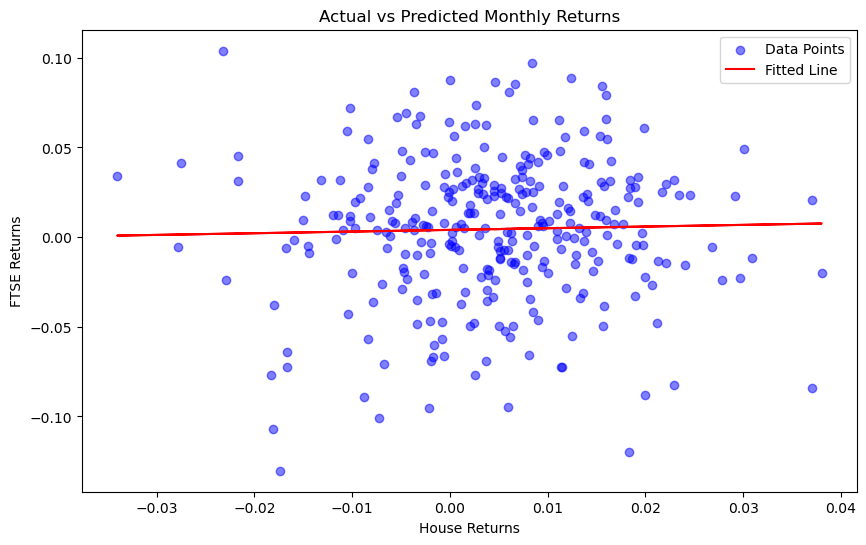

In [6]:
# Rename the column for house data
house_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
ftse_data['Date'] = pd.to_datetime(ftse_data['Date'])
house_data['Date'] = pd.to_datetime(house_data['Date'])

# Filter by specified date range (01-Jan-1991 to 31-Dec-2016)
start_date = '1991-01-01'
end_date = '2016-12-31'
filtered_ftse_data = ftse_data[(ftse_data['Date'] >= start_date) & (ftse_data['Date'] <= end_date)]
filtered_house_data = house_data[(house_data['Date'] >= start_date) & (house_data['Date'] <= end_date)]

# Sort FTSE data by Date
filtered_ftse_data.sort_values(by='Date', inplace=True)

# Calculate monthly returns using pct_change()
filtered_ftse_data['Returns'] = filtered_ftse_data['Adj Close'].pct_change()
filtered_house_data['Returns'] = filtered_house_data['Average House Price'].pct_change()

# Drop NaN values resulting from pct_change()
ftse_returns = filtered_ftse_data[['Date', 'Returns']].dropna()
house_returns = filtered_house_data[['Date', 'Returns']].dropna()

# Ensure both datasets have the same number of entries for regression analysis
min_length = min(len(ftse_returns), len(house_returns))

# Use only the first min_length entries for both datasets
ftse_subset = ftse_returns['Returns'].values[:min_length]
house_subset = house_returns['Returns'].values[:min_length]

# Create regression model
slope, intercept, r_value, p_value, std_err = linregress(house_subset, ftse_subset)

# Print regression results
print("Regression Results:")
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"R-value: {r_value:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard Error: {std_err:.6f}")

# Predicted values based on the regression model
predictions = intercept + slope * house_subset

# Plot results with fitted line
plt.figure(figsize=(10, 6))
plt.scatter(house_subset, ftse_subset, label='Data Points', color='blue', alpha=0.5)

# Plotting the fitted line
plt.plot(house_subset, predictions, label='Fitted Line', color='red')
plt.title('Actual vs Predicted Monthly Returns')
plt.xlabel('House Returns')
plt.ylabel('FTSE Returns')
plt.legend()
plt.show();

In [7]:
# Calculate correlation coefficient
correlation_coefficient = pd.Series(ftse_subset).corr(pd.Series(house_subset))
print(f'Correlation Coefficient: {correlation_coefficient:.6f}')


Correlation Coefficient: 0.026551


In [8]:
# Hypothesis test interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Fail to reject the null hypothesis: No significant relationship.


## Question 2: Predicting Graduation rate 

In [10]:
college_data = pd.read_csv("College.csv")

In [11]:
college_data.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

##### Part a: Calculate the Correlation Coefficients

In [13]:
# Rename columns for better understanding
college_data.rename(columns={
    'Apps': 'Applications',
    'Enroll': 'Enrolled_Students',
    'Outstate': 'Out_of_State_Students',
    'Top10perc': 'Top_10_Percent',
    'Top25perc': 'Top_25_Percent',
    'Grad.Rate': 'Graduation_Rate'
}, inplace=True)

# Select relevant columns for analysis
columns_of_interest = ['Applications', 'Enrolled_Students', 'Out_of_State_Students', 
                        'Top_10_Percent', 'Top_25_Percent', 'Graduation_Rate']

final_college_data = college_data[columns_of_interest]


In [14]:
final_college_data.head()

Applications  Enrolled_Students  Out_of_State_Students  Top_10_Percent  \
0          1660                721                   7440              23   
1          2186                512                  12280              16   
2          1428                336                  11250              22   
3           417                137                  12960              60   
4           193                 55                   7560              16   

   Top_25_Percent  Graduation_Rate  
0              52               60  
1              29               56  
2              50               54  
3              89               59  
4              44               15

In [15]:
# Calculate correlation coefficients
correlation_matrix = final_college_data.corr()

# Display the correlation matrix
print("Correlation Coefficients:")
correlation_matrix

Correlation Coefficients:


Applications  Enrolled_Students  Out_of_State_Students  \
Applications               1.000000           0.846822               0.050159   
Enrolled_Students          0.846822           1.000000              -0.155477   
Out_of_State_Students      0.050159          -0.155477               1.000000   
Top_10_Percent             0.338834           0.181294               0.562331   
Top_25_Percent             0.351640           0.226745               0.489394   
Graduation_Rate            0.146755          -0.022341               0.571290   

                       Top_10_Percent  Top_25_Percent  Graduation_Rate  
Applications                 0.338834        0.351640         0.146755  
Enrolled_Students            0.181294        0.226745        -0.022341  
Out_of_State_Students        0.562331        0.489394         0.571290  
Top_10_Percent               1.000000        0.891995         0.494989  
Top_25_Percent               0.891995        1.000000         0.477281  
Graduation_Rate              0.494989        0.477281         1.000000

## b.

In [17]:
# Define dependent and independent variables using the original subset_data
independent_vars = final_college_data[['Applications', 'Enrolled_Students', 'Out_of_State_Students', 
                        'Top_10_Percent', 'Top_25_Percent']]
dependent_var = final_college_data['Graduation_Rate']

# Add a constant term for the intercept
independent_vars_with_const = sm.add_constant(independent_vars)

# Fit the initial OLS model
full_model = sm.OLS(dependent_var, independent_vars_with_const).fit()

import statsmodels.api as sm

def forward_selection(X, y, entry_threshold=0.05):
    """Perform forward selection for stepwise regression."""
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        best_p_value = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            # Fit model with the current feature added
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            p_value = model.pvalues[feature]
            
            # Check if p-value is the best so far
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        
        # If the best feature's p-value is below the entry threshold, add it to the model
        if best_p_value < entry_threshold:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break  # Stop if no more features meet the criteria

    return selected_features

# Execute forward selection
optimal_features_forward = forward_selection(independent_vars, dependent_var)
print("Optimal Features Selected (Forward Selection):", optimal_features_forward)


Optimal Features Selected (Forward Selection): ['Out_of_State_Students', 'Top_25_Percent']


In [18]:
def backward_elimination(X, y, exit_threshold=0.05):
    """Perform backward elimination for stepwise regression."""
    selected_features = list(X.columns)
    
    while selected_features:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        p_values = model.pvalues[1:]  # Skip intercept
        
        # Find the highest p-value
        max_p_value = p_values.max()
        
        # If the highest p-value exceeds the exit threshold, remove that feature
        if max_p_value > exit_threshold:
            worst_feature = p_values.idxmax()
            selected_features.remove(worst_feature)
        else:
            break  # Stop if all features are significant

    return selected_features

# Execute backward elimination
optimal_features_backward = backward_elimination(independent_vars, dependent_var)
print("Optimal Features Selected (Backward Elimination):", optimal_features_backward)

Optimal Features Selected (Backward Elimination): ['Applications', 'Enrolled_Students', 'Out_of_State_Students', 'Top_25_Percent']


In [19]:
from sklearn.metrics import mean_squared_error

# Fit models based on selected features from forward selection
X_forward = sm.add_constant(independent_vars[optimal_features_forward])
model_forward = sm.OLS(dependent_var, X_forward).fit()

# Fit models based on selected features from backward elimination
X_backward = sm.add_constant(independent_vars[optimal_features_backward])
model_backward = sm.OLS(dependent_var, X_backward).fit()

# Print summaries for both models
print("Forward Selection Model Summary:")
print(model_forward.summary())

print("\nBackward Elimination Model Summary:")
print(model_backward.summary())

# Calculate and compare MSE for both models
mse_forward = mean_squared_error(dependent_var, model_forward.predict(X_forward))
mse_backward = mean_squared_error(dependent_var, model_backward.predict(X_backward))

print(f"MSE of Forward Selection Model: {mse_forward}")
print(f"MSE of Backward Elimination Model: {mse_backward}")

Forward Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Graduation_Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.82e-80
Time:                        21:36:02   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Model Selection Rationale
Based on the analysis of graduation rates using both forward selection and backward elimination methods, we have chosen the Backward Elimination Model for the following reasons:
Higher Predictive Power: The backward elimination model achieved a higher R-squared value of 0.386, indicating that approximately 38.6% of the variance in graduation rates can be explained by the included predictors. In contrast, the forward selection model had an R-squared value of 0.378.
Lower Mean Squared Error (MSE): The MSE for the backward elimination model was 181.03, compared to 183.37 for the forward selection model. This lower MSE suggests that the backward elimination model provides better predictive accuracy on the dataset.
Significant Predictors: The backward elimination model retained four significant predictors:
Applications: Positively associated with graduation rates.
Enrolled Students: Negatively associated, indicating potential resource limitations.
Out of State Students: Positively associated, suggesting that a diverse student body may enhance graduation outcomes.
Top 25 Percent: Strongly positively associated, emphasizing the importance of academic preparedness.

## d

In [22]:
import pandas as pd
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define independent variables and target variable
full_feature_set = ['Applications', 'Enrolled_Students', 'Out_of_State_Students', 
                    'Top_10_Percent', 'Top_25_Percent']
X = final_college_data[['Applications', 'Enrolled_Students', 'Out_of_State_Students', 
                        'Top_10_Percent', 'Top_25_Percent']]
y = final_college_data['Graduation_Rate']


# Fit the LassoLarsIC model with BIC criterion
lasso_model = LassoLarsIC(criterion='bic')
lasso_model.fit(X, y)

# Get selected features and their coefficients
selected_features = X.columns[(lasso_model.coef_ != 0)]
print("Selected Features using LassoLarsIC:", selected_features)

# Fit Full Model for BIC Calculation
full_model = LinearRegression()
full_model.fit(X, y)

# Calculate RSS for Full Model
y_pred_full = full_model.predict(X)
rss_full = ((y - y_pred_full) ** 2).sum()  # Residual Sum of Squares
n = len(y)  # Number of observations
k_full = len(full_feature_set)  # Number of predictors in full model

# Calculate BIC for Full Model
bic_full = n * np.log(rss_full / n) + k_full * np.log(n)
print(f"BIC for Full Model with All Predictors: {bic_full:.2f}")

# Prepare data for selected features model
X_selected = X[selected_features]

# Fit model using selected features
selected_model = LinearRegression()
selected_model.fit(X_selected, y)
y_pred_selected = selected_model.predict(X_selected)

# Calculate RSS for Selected Features Model
rss_selected = ((y - y_pred_selected) ** 2).sum()  # Residual Sum of Squares
k_selected = len(selected_features)  # Number of predictors in selected model

# Calculate BIC for Selected Features Model
bic_selected = n * np.log(rss_selected / n) + k_selected * np.log(n)
print(f"BIC for Selected Model (using Lasso): {bic_selected:.2f}")

Selected Features using LassoLarsIC: Index(['Applications', 'Enrolled_Students', 'Out_of_State_Students',
       'Top_25_Percent'],
      dtype='object')
BIC for Full Model with All Predictors: 4072.06
BIC for Selected Model (using Lasso): 4065.99


## e

In [24]:
# Calculate MSE for Full Model
mse_full = mean_squared_error(y, y_pred_full)
print(f"MSE for Full Model: {mse_full:.2f}")

# Calculate MSE for Selected Features Model
mse_selected = mean_squared_error(y, y_pred_selected)
print(f"MSE for Selected Model (using Lasso): {mse_selected:.2f}")

# Compare MSE values
if mse_selected < mse_full:
    print("The Selected Model (using Lasso) provides better predictive accuracy.")
else:
    print("The Full Model provides better predictive accuracy.")

MSE for Full Model: 180.90
MSE for Selected Model (using Lasso): 181.03
The Full Model provides better predictive accuracy.


## f

In [26]:
# Example predictor values for CMU (replace with actual values)
cmu_predictors = pd.DataFrame({
    'Applications': [8728],         # Example value 
    'Enrolled_Students': [1191],     # Example value 
    'Out_of_State_Students': [17900],   # Example value 
    'Top_25_Percent': [89]           # Example value 
})

# Predict graduation rate using the reduced model (backward elimination)
predicted_graduation_rate_cmu = selected_model.predict(cmu_predictors)
print(f"Predicted Graduation Rate for Carnegie Mellon University: {predicted_graduation_rate_cmu[0]:.2f}")

Predicted Graduation Rate for Carnegie Mellon University: 89.13


### Question 3: Evaluating the Impact of Private Investment in Transport Infrastructure on Employment-to-Population Ratio

In [28]:

def transform_data(data):
    # Melt the DataFrame to transform years from columns to rows
    transformed_data = pd.melt(
        data,
        id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Investment"
    )
    
    # Remove any non-numeric year rows
    transformed_data = transformed_data[transformed_data["Year"].str.isnumeric()]
    
    # Convert the 'Year' column to integer
    transformed_data["Year"] = transformed_data["Year"].astype(int)
    
    return transformed_data


data = pd.read_csv("Investment in transport.csv", skiprows=4)
transport_data= transform_data(data)

In [29]:
transport_data.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  Year  \
0  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
1  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
2  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
3  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
4  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   

   Investment  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [30]:
data3 = pd.read_csv("employment.csv", skiprows=4)
employment_data= transform_data(data3)

In [31]:
employment_data.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  Year  \
0  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS  1960   
1  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS  1960   
2  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS  1960   
3  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS  1960   
4  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS  1960   

   Investment  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [32]:
#Merge GDP Growth data with Transport Investment data
merged_data2 = pd.merge(transport_data, employment_data, on=["Country Code", "Year"], how="inner")

In [33]:
merged_data2.head()

Country Name_x Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                    Indicator Name_x Indicator Code_x  Year  \
0  Investment in transport with private participa...   IE.PPI.TRAN.CD  1960   
1  Investment in transport with private participa...   IE.PPI.TRAN.CD  1960   
2  Investment in transport with private participa...   IE.PPI.TRAN.CD  1960   
3  Investment in transport with private participa...   IE.PPI.TRAN.CD  1960   
4  Investment in transport with private participa...   IE.PPI.TRAN.CD  1960   

   Investment_x               Country Name_y  \
0           NaN                        Aruba   
1           NaN  Africa Eastern and Southern   
2           NaN                  Afghanistan   
3           NaN   Africa Western and Central   
4           NaN                       Angola   

                                    Indicator Name_y   Indicator Code_y  \
0  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   
1  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   
2  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   
3  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   
4  Employment to population ratio, 15+, total (%)...  SL.EMP.TOTL.SP.ZS   

   Investment_y  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [34]:
# Rename the columns
merged_data2.rename(columns={
    'Country Name_x': 'Country Name',
    'Country Code_x': 'Country Code',
    'Indicator Name_x': 'Indicator Name',
    'Indicator Code_x': 'Indicator Code',
    'Investment_x': 'Transport Investment (US$)',
    'Country Name_y': 'Country Name (Employment)',
    'Country Code_y': 'Country Code (Employment)',
    'Indicator Name_y': 'Employment Indicator Name',
    'Indicator Code_y': 'Employment Indicator Code',
    'Investment_y': 'Employment-to-Population Ratio (15+)'  # Renamed here
}, inplace=True)
# Display the first few rows of the renamed DataFrame
merged_data2.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  Year  \
0  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
1  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
2  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
3  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   
4  Investment in transport with private participa...  IE.PPI.TRAN.CD  1960   

   Transport Investment (US$)    Country Name (Employment)  \
0                         NaN                        Aruba   
1                         NaN  Africa Eastern and Southern   
2                         NaN                  Afghanistan   
3                         NaN   Africa Western and Central   
4                         NaN                       Angola   

                           Employment Indicator Name  \
0  Employment to population ratio, 15+, total (%)...   
1  Employment to population ratio, 15+, total (%)...   
2  Employment to population ratio, 15+, total (%)...   
3  Employment to population ratio, 15+, total (%)...   
4  Employment to population ratio, 15+, total (%)...   

  Employment Indicator Code  Employment-to-Population Ratio (15+)  
0         SL.EMP.TOTL.SP.ZS                                   NaN  
1         SL.EMP.TOTL.SP.ZS                                   NaN  
2         SL.EMP.TOTL.SP.ZS                                   NaN  
3         SL.EMP.TOTL.SP.ZS                                   NaN  
4         SL.EMP.TOTL.SP.ZS                                   NaN

In [35]:
#Filter the merged dataset to include only relevant years (e.g., from 1960 to 2020) and ensure there are no missing values in key columns.

# Filter for years between 1960 and 2020
filtered_df = merged_data2[(merged_data2['Year'] >= 1960) & (merged_data2['Year'] <= 2020)]

# Check for missing values in relevant columns
print(filtered_df[['Transport Investment (US$)', 'Employment-to-Population Ratio (15+)']].isnull().sum())

# Drop rows with missing values
cleaned_df = filtered_df.dropna(subset=['Transport Investment (US$)', 'Employment-to-Population Ratio (15+)'])

# Display the cleaned DataFrame
cleaned_df.head()

Transport Investment (US$)              15361
Employment-to-Population Ratio (15+)     9176
dtype: int64


Country Name Country Code  \
8255                                    Argentina          ARG   
8286                                        China          CHN   
8307  East Asia & Pacific (excluding high income)          EAP   
8352                                    Indonesia          IDN   
8400                                       Mexico          MEX   

                                         Indicator Name  Indicator Code  Year  \
8255  Investment in transport with private participa...  IE.PPI.TRAN.CD  1991   
8286  Investment in transport with private participa...  IE.PPI.TRAN.CD  1991   
8307  Investment in transport with private participa...  IE.PPI.TRAN.CD  1991   
8352  Investment in transport with private participa...  IE.PPI.TRAN.CD  1991   
8400  Investment in transport with private participa...  IE.PPI.TRAN.CD  1991   

      Transport Investment (US$)                    Country Name (Employment)  \
8255                2.235000e+08                                    Argentina   
8286                2.378800e+09                                        China   
8307                2.805300e+09  East Asia & Pacific (excluding high income)   
8352                1.080000e+07                                    Indonesia   
8400                3.955000e+08                                       Mexico   

                              Employment Indicator Name  \
8255  Employment to population ratio, 15+, total (%)...   
8286  Employment to population ratio, 15+, total (%)...   
8307  Employment to population ratio, 15+, total (%)...   
8352  Employment to population ratio, 15+, total (%)...   
8400  Employment to population ratio, 15+, total (%)...   

     Employment Indicator Code  Employment-to-Population Ratio (15+)  
8255         SL.EMP.TOTL.SP.ZS                             56.747000  
8286         SL.EMP.TOTL.SP.ZS                             77.072000  
8307         SL.EMP.TOTL.SP.ZS                             74.513241  
8352         SL.EMP.TOTL.SP.ZS                             64.222000  
8400         SL.EMP.TOTL.SP.ZS                             56.435000

Correlation Coefficient: 0.04095559790623422
P-value: 0.23600644905161985


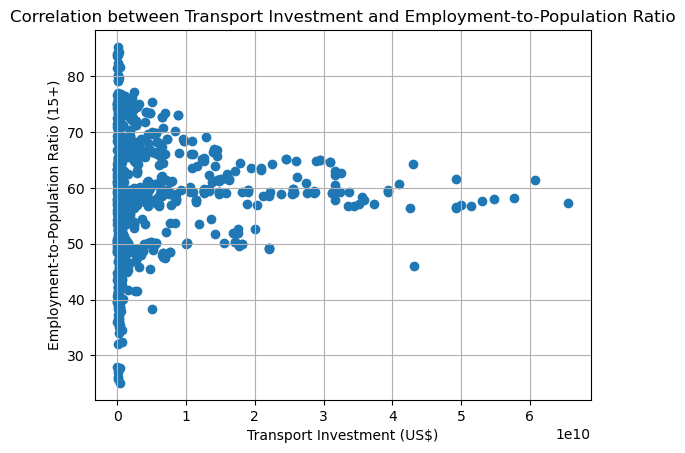

In [36]:
#Correlation Analysis: Calculate the correlation coefficient and p-value to check for a statistically significant linear relationship.

from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(cleaned_df['Transport Investment (US$)'], cleaned_df['Employment-to-Population Ratio (15+)'])

# Print the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Visualize the relationship
plt.scatter(cleaned_df['Transport Investment (US$)'], cleaned_df['Employment-to-Population Ratio (15+)'])
plt.title('Correlation between Transport Investment and Employment-to-Population Ratio')
plt.xlabel('Transport Investment (US$)')
plt.ylabel('Employment-to-Population Ratio (15+)')
plt.grid()
plt.show()

In [37]:
# Prepare the data for regression
X = cleaned_df['Transport Investment (US$)']  # Independent variable
y = cleaned_df['Employment-to-Population Ratio (15+)']  # Dependent variable

# Add a constant to the independent variable for the intercept
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const).fit()
# Print the summary of the regression results
print(model.summary())



                                     OLS Regression Results                                     
Dep. Variable:     Employment-to-Population Ratio (15+)   R-squared:                       0.002
Model:                                              OLS   Adj. R-squared:                  0.000
Method:                                   Least Squares   F-statistic:                     1.406
Date:                                  Tue, 15 Oct 2024   Prob (F-statistic):              0.236
Time:                                          21:36:03   Log-Likelihood:                -3087.4
No. Observations:                                   839   AIC:                             6179.
Df Residuals:                                       837   BIC:                             6188.
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

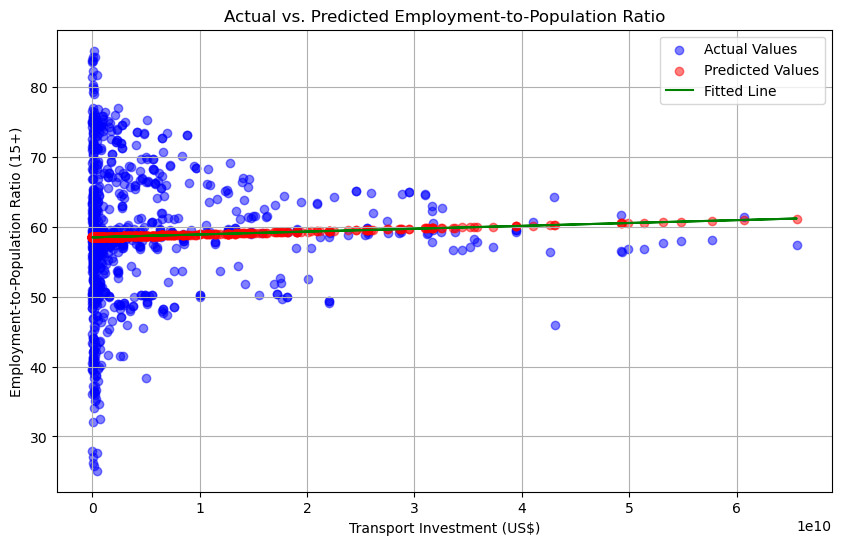

In [38]:

# Get predicted values
predictions = model.predict(X_with_const)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X, y, color='blue', label='Actual Values', alpha=0.5)

# Scatter plot for predicted values
plt.scatter(X, predictions, color='red', label='Predicted Values', alpha=0.5)

# Plotting the fitted line manually
plt.plot(X, predictions, color='green', label='Fitted Line')

# Set plot titles and labels
plt.title('Actual vs. Predicted Employment-to-Population Ratio')
plt.xlabel('Transport Investment (US$)')
plt.ylabel('Employment-to-Population Ratio (15+)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:


# Step 4: Prepare data for 2021 prediction
average_investment_2020 = cleaned_df[cleaned_df['Year'] == 2020]['Transport Investment (US$)'].mean()

# Step 5: Create a DataFrame for 2021 with the correct structure
# Include both the constant and the transport investment
investment_2021 = pd.DataFrame({'const': 1, 'Transport Investment (US$)': [average_investment_2020]})

# Verify the shape of the DataFrame after adding the constant
# print(f"Shape of investment_2021: {investment_2021.shape}")
# print(f"Shape of model input data (X): {X.shape}")
# print(investment_2021.head())  # Check the structure

# Step 6: Predict employment rate for 2021 based on transport investment
predicted_employment_ratio = model.predict(investment_2021)

# Step 7: Print the predicted employment ratio for 2021
print(f"Predicted Employment-to-Population Ratio for 2021: {predicted_employment_ratio[0]:.2f}%")


Predicted Employment-to-Population Ratio for 2021: 58.58%


### Question 4: 

In [41]:
data = pd.read_csv('Israeli_Unemployment_Rate.csv')  # Replace with actual file path
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())

In [42]:
data.head()

Date  Value  Date_Ordinal
0 1980-12-31  4.780        723180
1 1981-12-31  5.115        723545
2 1982-12-31  5.048        723910
3 1983-12-31  4.562        724275
4 1984-12-31  5.893        724641

In [43]:
data = data.rename(columns={"Value": "Unemployment_Rate"})


In [44]:
# Transform the datetime objects into ordinal format, which represents 
# each date as an integer value (the number of days since a fixed point in time).
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Filter the dataset to include only records from 1980 to 2013.
# This is important because we want to train our model on historical data only.
data = data[(data['Date'].dt.year >= 1980) & (data['Date'].dt.year <= 2013)]

# Define the independent variable (X) and dependent variable (y).
# Here, X is a DataFrame containing the ordinal date values, and y contains the unemployment rates.
X = data[['Date_Ordinal']]  # Use double brackets to keep X as a DataFrame.
y = data['Unemployment_Rate']  # The target variable we want to predict.

# Create an instance of the Linear Regression model from scikit-learn.
model = LinearRegression()

# Fit the linear regression model using the entire dataset. 
# This trains the model to understand the relationship between dates and unemployment rates.
model.fit(X, y)

# To predict the unemployment rate for January 1, 2020, we first convert this date to ordinal format.
date_2020 = pd.to_datetime('2020-01-01').toordinal()

# Use the trained model to predict the unemployment rate for 2020.
# We ensure that the input is in DataFrame format with a defined column name to avoid warnings.
predicted_rate_2020 = model.predict(pd.DataFrame([[date_2020]], columns=['Date_Ordinal']))

# Output the predicted unemployment rate for 2020.
print(f'Predicted Unemployment Rate for 2020: {predicted_rate_2020[0]}')

# Initialize lists to store predicted values and actual values for MAPE calculation.
predictions = []
actual_values = []

# Loop through each year from 1998 to 2013 to make predictions and gather actual unemployment rates.
for year in range(1998, 2014):
    # Convert January 1 of each year to ordinal format for prediction.
    date_year = pd.to_datetime(f'{year}-01-01').toordinal()
    
    # Predict the unemployment rate for that specific year using the trained model.
    # Again, ensure that we are passing a DataFrame with a defined column name.
    predicted_rate = model.predict(pd.DataFrame([[date_year]], columns=['Date_Ordinal']))[0]
    
    # Append both predicted and actual values to their respective lists for later analysis.
    predictions.append(predicted_rate)
    actual_values.append(data[data['Date'].dt.year == year]['Unemployment_Rate'].values[0])

# Calculate Mean Absolute Percentage Error (MAPE) to evaluate model performance.
# MAPE measures how accurate our predictions are as a percentage of actual values.
mape = sum(abs((actual - predicted) / actual) for actual, predicted in zip(actual_values, predictions)) / len(actual_values) * 100

# Output final results: predicted unemployment rate for 2020 and calculated MAPE value.
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Predicted Unemployment Rate for 2020: 11.246077316862227
Mean Absolute Percentage Error (MAPE): 25.83462688500448%
